In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# All Gather

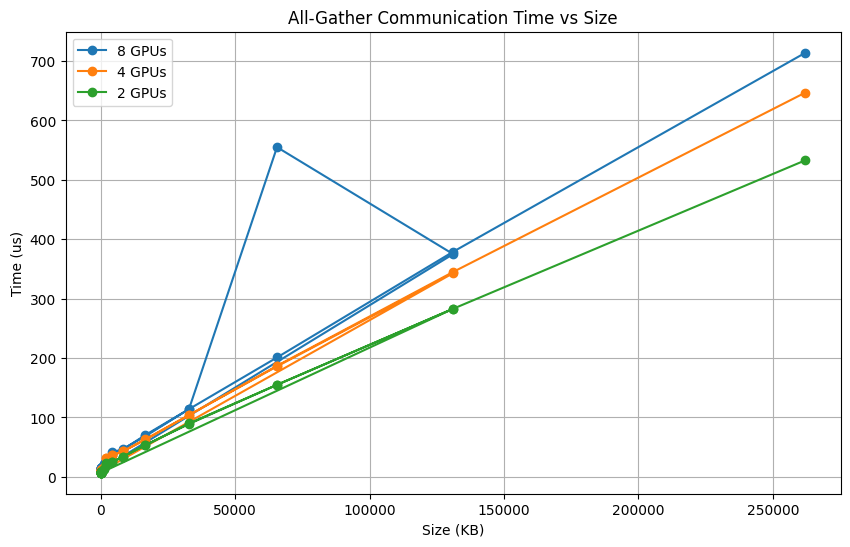

In [4]:
filename = "all_gather.csv"
data = pd.read_csv(filename)
data.head()

import matplotlib.pyplot as plt

# Create line plot
plt.figure(figsize=(10,6))

# Plot one line per num_gpus_per_node value
for idx, n_gpus in enumerate(data['num_gpus_per_node'].unique()):
    subset = data[data['num_gpus_per_node'] == n_gpus]
    x = subset['size(kb)']
    y = subset['time(us)']

    # # k = (y[len(y) - 1] - y[len(y) - 2]) / (x[len(x) -1] - x[len(x) -2])
    # y1, y2 = y[-2:].tolist()
    # x1, x2 = x[-2:].tolist()
    # k = (y2 - y1) / (x2 - x1)
    # b = y[:1].tolist()[0]
    plt.plot(x, y, marker='o', label=f'{n_gpus} GPUs')

plt.xlabel('Size (KB)')
plt.ylabel('Time (us)')
plt.title('All-Gather Communication Time vs Size')
plt.legend()
plt.grid(True)
# save the figure
plt.savefig('all_gather.png')
plt.show()



In [5]:
import plotly.express as px
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Plot one line per num_gpus_per_node value
for n_gpus in data['num_gpus_per_node'].unique():
    subset = data[data['num_gpus_per_node'] == n_gpus]
    fig.add_trace(go.Scatter(
        x=subset['size(kb)'],
        y=subset['time(us)'],
        mode='lines+markers',
        name=f'{n_gpus} GPUs'
    ))

# Update layout
fig.update_layout(
    title='All-Gather Communication Time vs Size',
    xaxis_title='Size (KB)',
    yaxis_title='Time (us)',
    width=1000,
    height=600,
    showlegend=True
)

fig.show()


# Reduce Scatter

In [6]:
filename = "reduce_scatter.csv"
data = pd.read_csv(filename)
data.head()

,gpu,num_nodes,num_gpus_per_node,dtype,size(kb),time(us)
0,H100-SXM-80GB,1,8,half,0,12.0
1,H100-SXM-80GB,1,4,half,0,9.0
2,H100-SXM-80GB,1,2,half,0,7.0
3,H100-SXM-80GB,1,8,half,1,12.0
4,H100-SXM-80GB,1,4,half,1,9.0


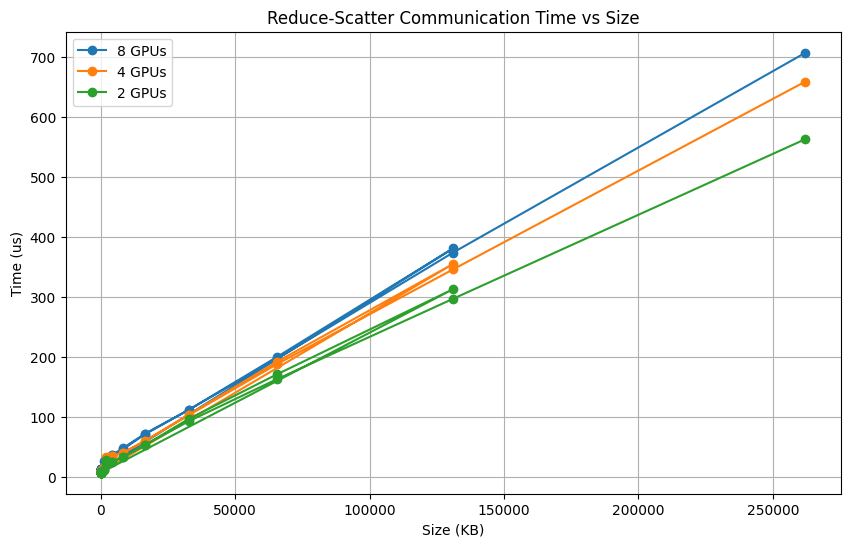

In [7]:
import matplotlib.pyplot as plt

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot one line per num_gpus_per_node value
for n_gpus in data['num_gpus_per_node'].unique():
    subset = data[data['num_gpus_per_node'] == n_gpus]
    plt.plot(subset['size(kb)'], subset['time(us)'], 
             marker='o', label=f'{n_gpus} GPUs')

# Customize the plot
plt.title('Reduce-Scatter Communication Time vs Size')
plt.xlabel('Size (KB)')
plt.ylabel('Time (us)')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("reduce_scatter.png")
# Display the plot
plt.show()


# All-to-All

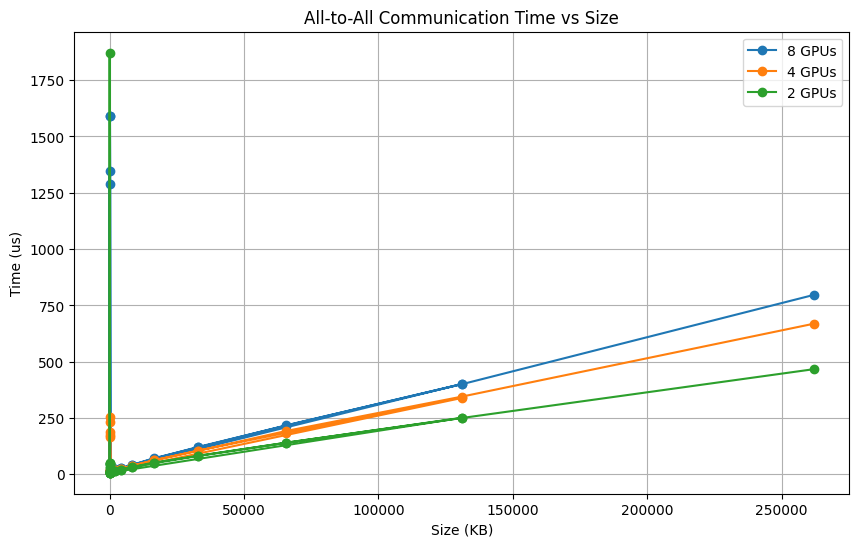

In [8]:
filename = "alltoall.csv"
data = pd.read_csv(filename)
data.head()


# %% cell 12 code

import matplotlib.pyplot as plt

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot one line per num_gpus_per_node value
for n_gpus in data['num_gpus_per_node'].unique():
    subset = data[data['num_gpus_per_node'] == n_gpus]
    plt.plot(subset['size(kb)'], subset['time(us)'], 
             marker='o', label=f'{n_gpus} GPUs')

# Customize the plot
plt.title('All-to-All Communication Time vs Size')
plt.xlabel('Size (KB)')
plt.ylabel('Time (us)')
plt.legend()
plt.grid(True)

# Display the plot
plt.savefig("alltoall.png")
plt.show()


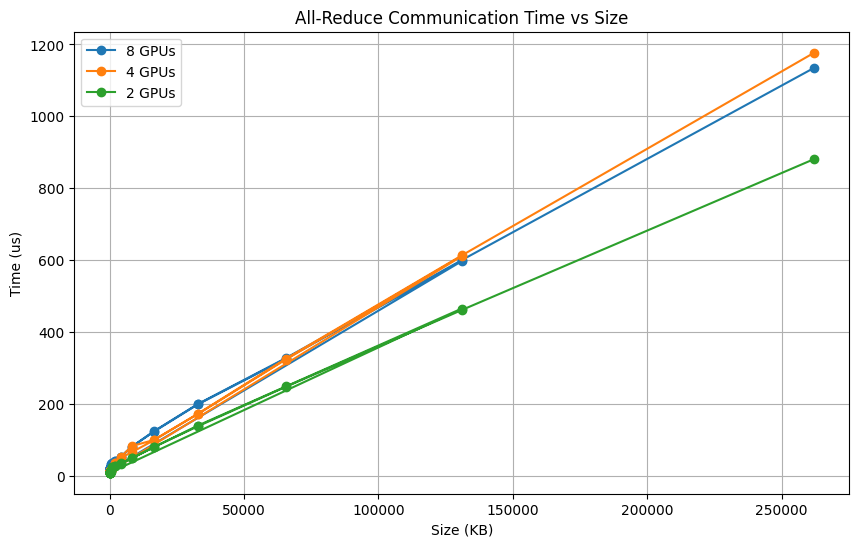

In [9]:
filename = "all_reduce.csv"
data = pd.read_csv(filename)
data.head()

import matplotlib.pyplot as plt

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot one line per num_gpus_per_node value
for n_gpus in data['num_gpus_per_node'].unique():
    subset = data[data['num_gpus_per_node'] == n_gpus]
    plt.plot(subset['size(kb)'], subset['time(us)'], 
             marker='o', label=f'{n_gpus} GPUs')

# Customize the plot
plt.title('All-Reduce Communication Time vs Size')
plt.xlabel('Size (KB)')
plt.ylabel('Time (us)')
plt.legend()
plt.grid(True)

# Display the plot
plt.savefig("all_reduce.png")

import plotly.express as px
import plotly.graph_objects as go

# Create plotly figure
fig = go.Figure()

# Add traces for each number of GPUs
for n_gpus in data['num_gpus_per_node'].unique():
    subset = data[data['num_gpus_per_node'] == n_gpus]
    fig.add_trace(
        go.Scatter(
            x=subset['size(kb)'],
            y=subset['time(us)'],
            mode='lines+markers',
            name=f'{n_gpus} GPUs'
        )
    )

# Update layout
fig.update_layout(
    title='All-Reduce Communication Time vs Size',
    xaxis_title='Size (KB)',
    yaxis_title='Time (us)',
    showlegend=True,
    template='plotly_white'
)

# Show the plot
fig.show()



# Curve Fitting